✅ 图表字体设置为默认英文字体，以避免乱码方框。

=== 模式识别课程设计 - 葡萄酒聚类分析 ===
环境设置完成!

模块2：数据加载和探索
🔍 搜索可用数据文件...
📁 找到: /kaggle/input/wine-dataset-for-clustering/wine-clustering.csv
✅ 数据加载成功! 📊 数据形状: (178, 13)

🔍 缺失值统计:
✅ 无缺失值

模块3：数据预处理
✅ 数据预处理完成! ➡️ 标准化后数据形状: (178, 13)

模块4：数据可视化 (基础分析)
📊 生成特征分布图...


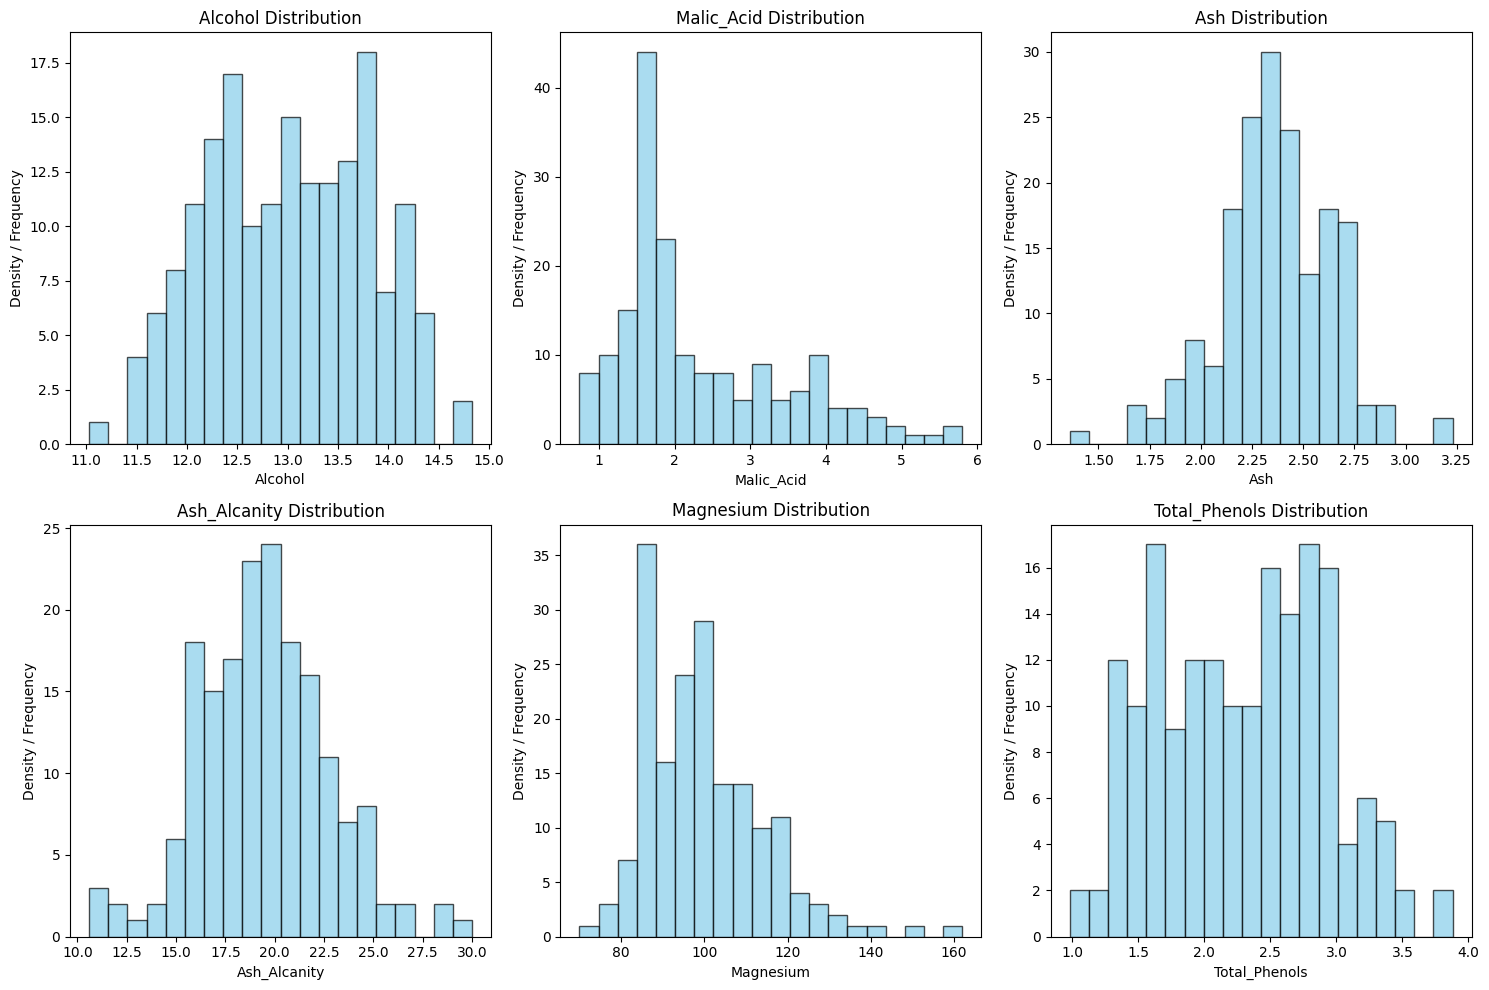

📈 生成相关性热图...


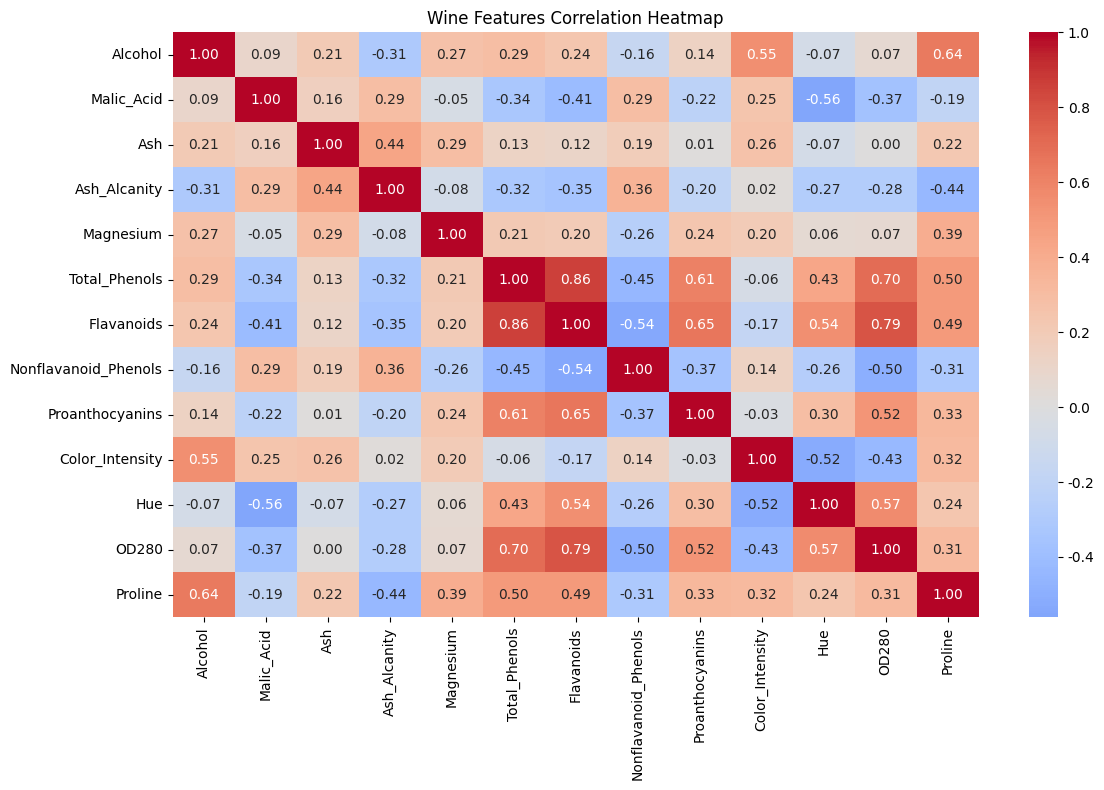

✅ 基础数据可视化完成!

模块5：特征降维 (PCA & t-SNE)
📉 执行PCA降维...


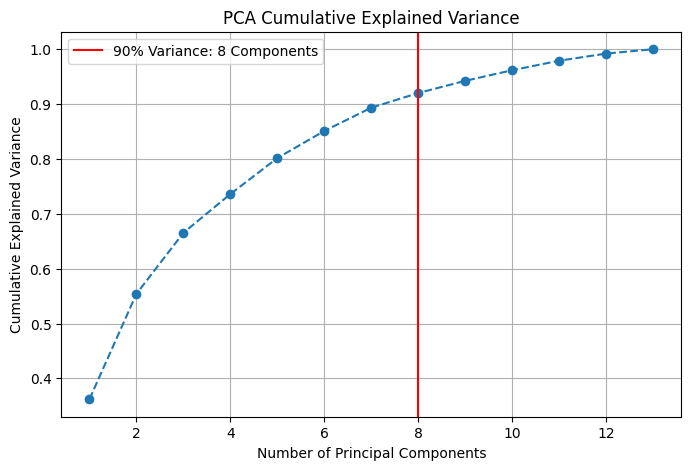

🔭 执行t-SNE降维...
✅ 降维完成!

模块7：聚类执行与评估
➡️ K-Means 聚类...


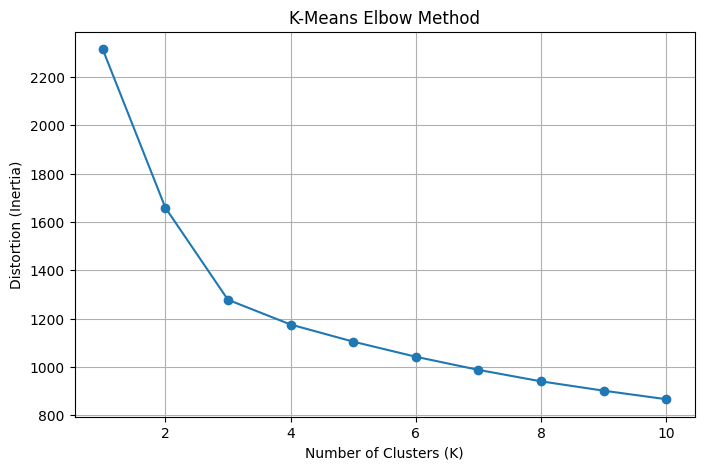

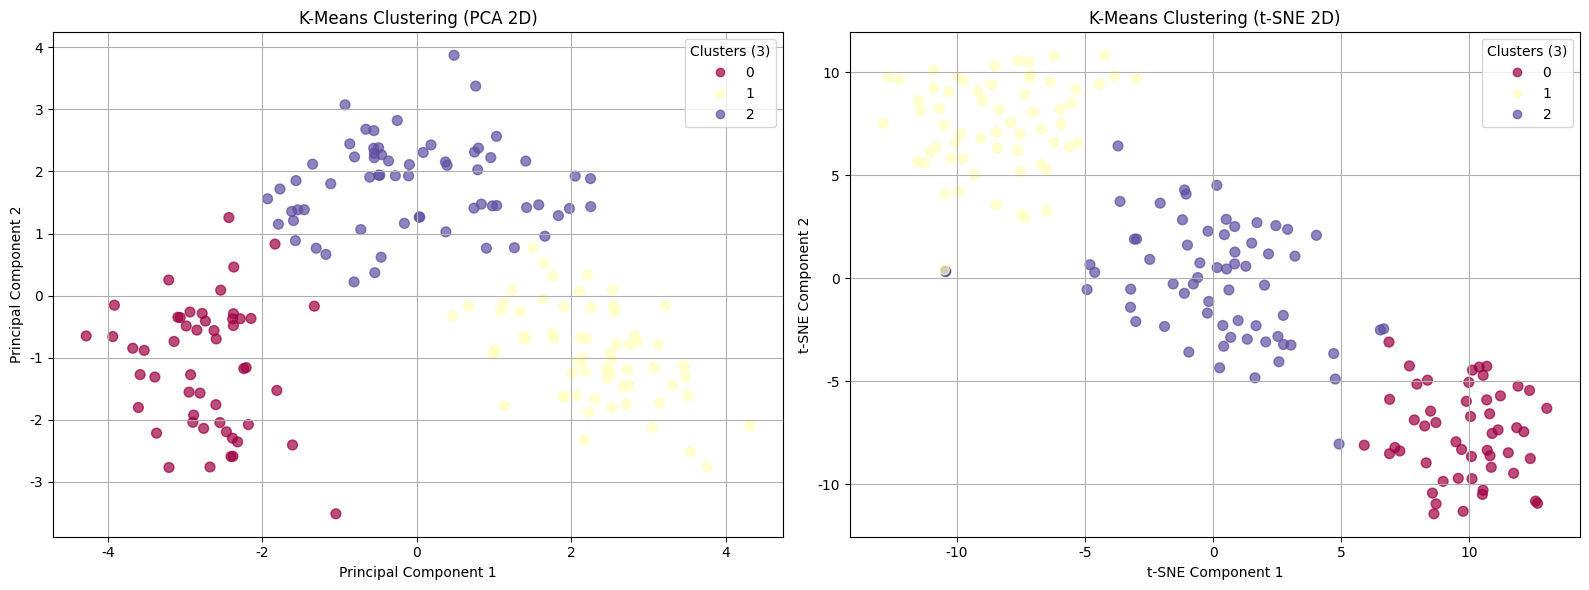

➡️ GMM 高斯混合模型 (深度分析)...


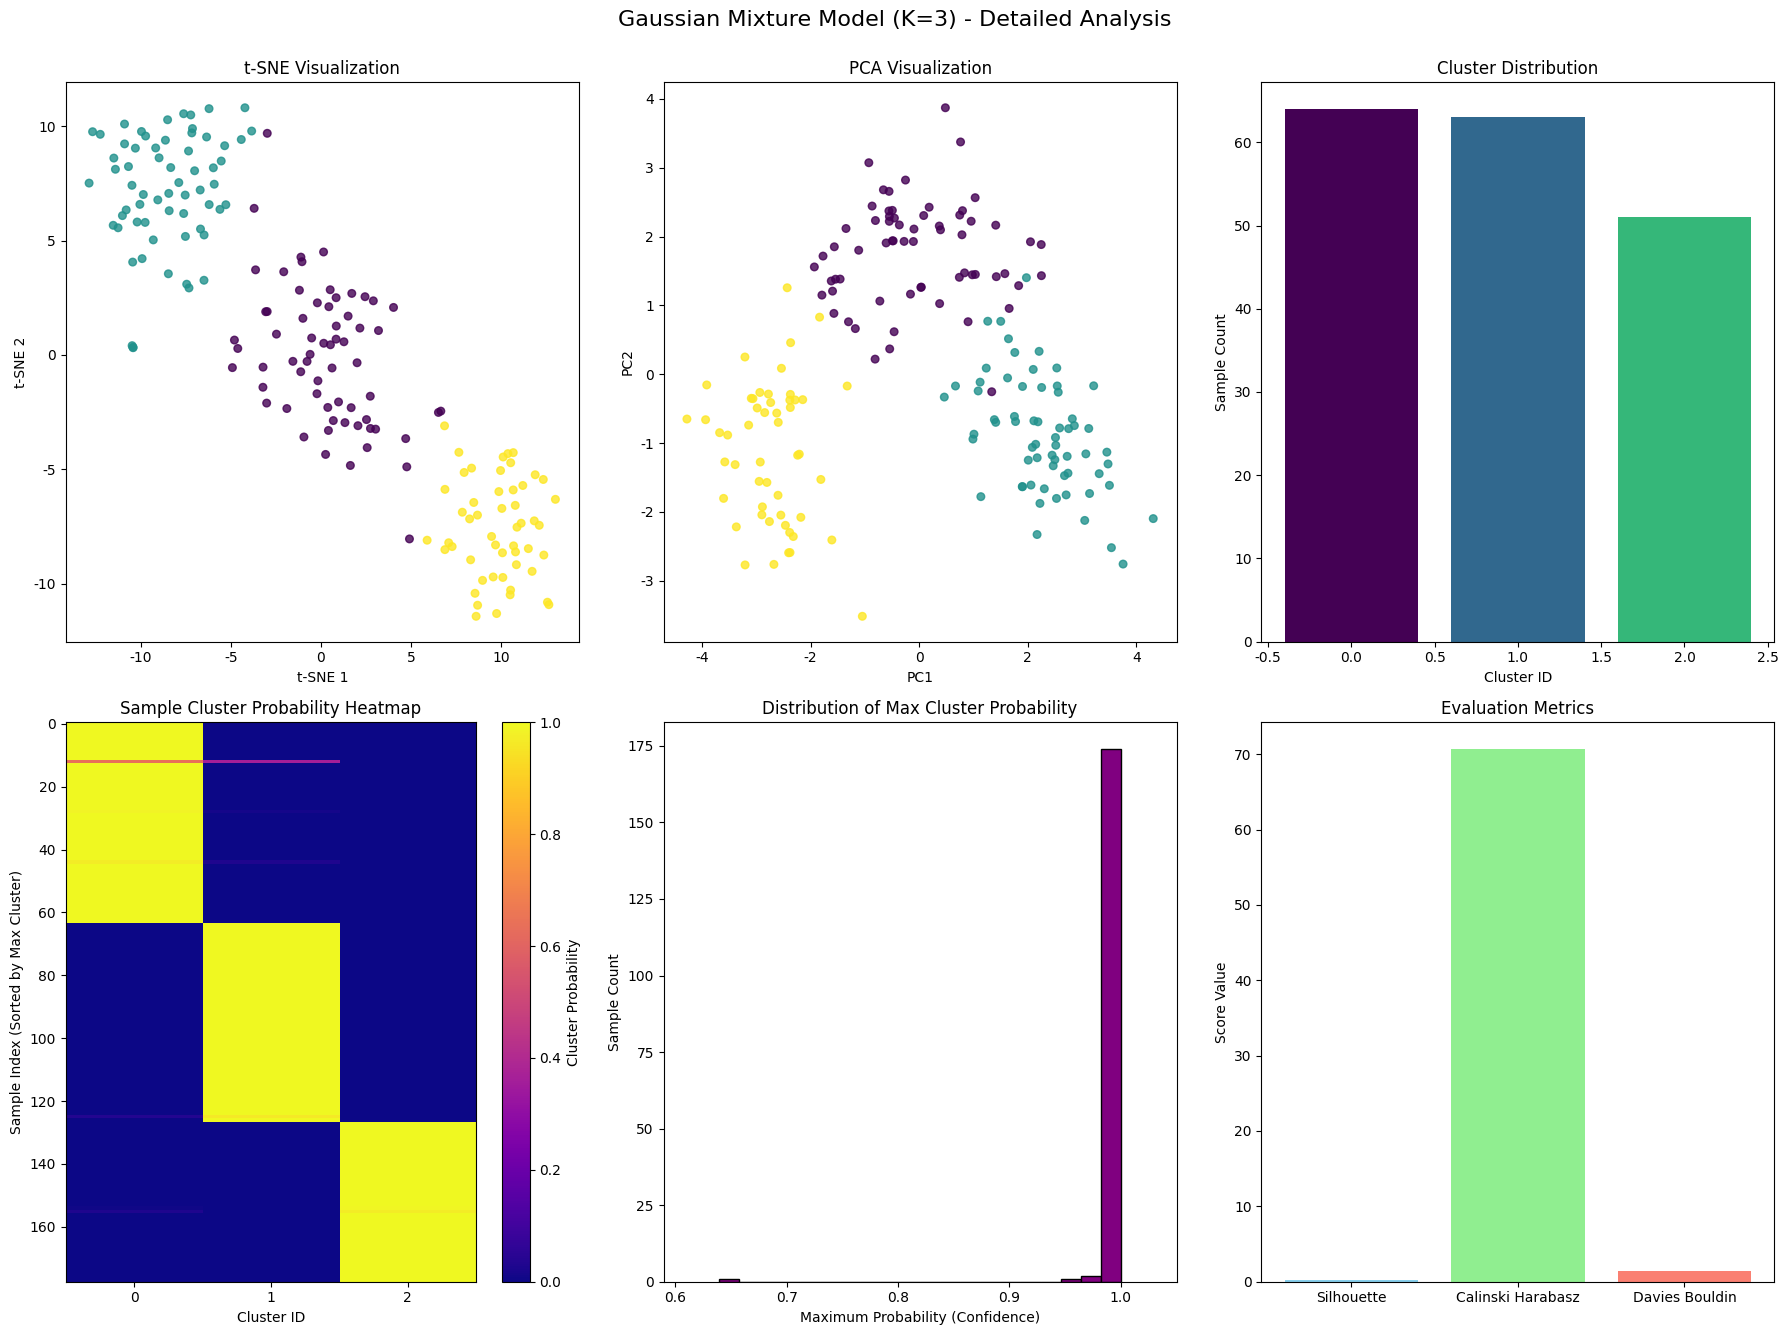

➡️ 层次聚类 (Agglomerative)...
🌲 生成层次聚类树状图...


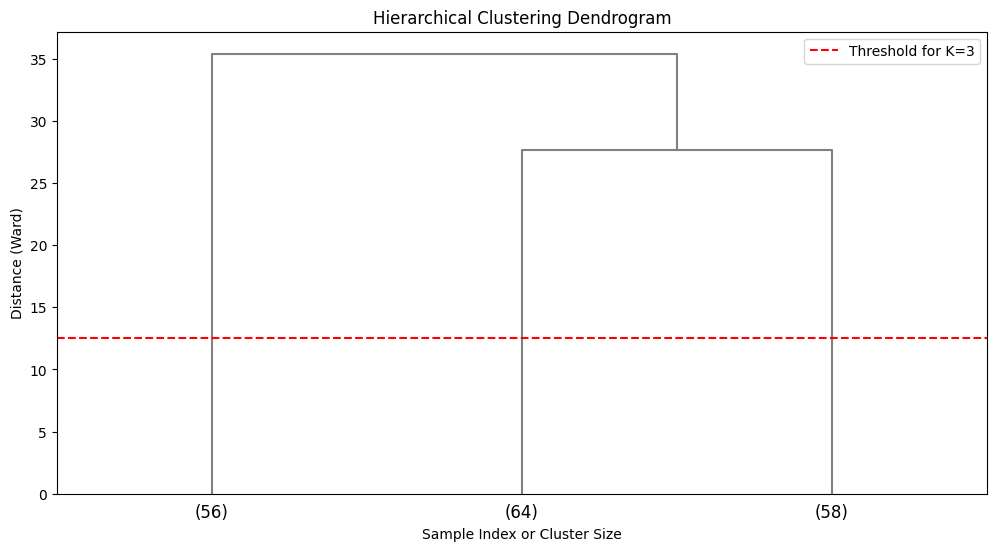

✅ 层次聚类树状图生成成功!


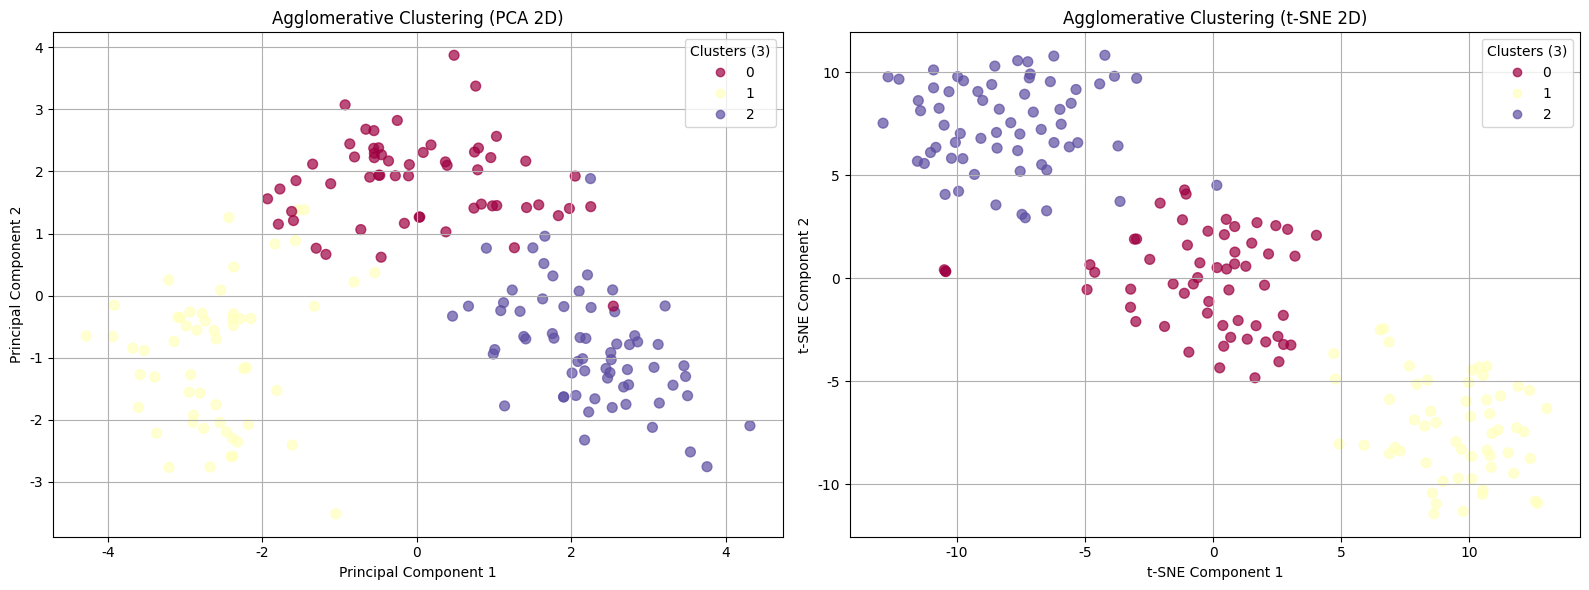

➡️ DBSCAN 密度聚类...


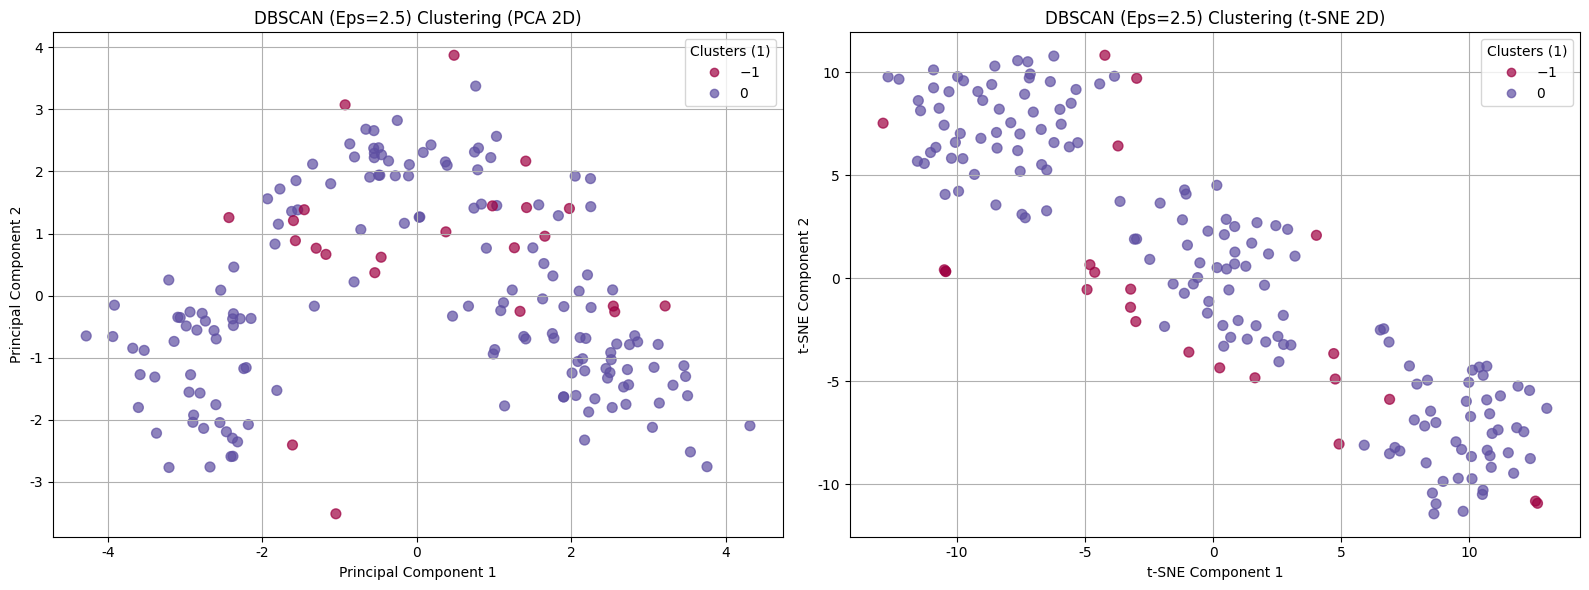


模块8：聚类结果评估

📊 聚类评估结果:
|               | Silhouette Score   | Calinski Harabasz Score   | Davies Bouldin Score   | External Score (AMI)   |
|:--------------|:-------------------|:--------------------------|:-----------------------|:-----------------------|
| K-Means       | 0.285              | 71                        | 1.389                  | N/A                    |
| GMM           | 0.284              | 71                        | 1.394                  | N/A                    |
| Agglomerative | 0.277              | 68                        | 1.419                  | N/A                    |
| DBSCAN        | N/A                | N/A                       | N/A                    | N/A                    |
✅ 评估完成!

🎉 所有模块执行完毕。报告已包含四种方法的对比和两种深度分析图（GMM六联图和层次树状图）。


In [1]:
# 项目：Wine Dataset for Clustering
# ==========================================
# 模块0：核心导入和英文显示设置
# ==========================================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage # 导入树状图工具
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_mutual_info_score
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings('ignore')

# --- 字体设置：避免中文乱码，统一使用英文字体 ---
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] 
plt.rcParams['axes.unicode_minus'] = False 
print("✅ 图表字体设置为默认英文字体，以避免乱码方框。")
# --------------------------------------------------

def setup_environment():
    """设置环境和创建目录"""
    os.makedirs('/kaggle/working/visualizations', exist_ok=True)
    print("\n=== 模式识别课程设计 - 葡萄酒聚类分析 ===")
    print("环境设置完成!")
    return True

# ==========================================
# 模块2：数据加载和探索 (保持中文输出)
# ==========================================
def load_and_explore_data():
    """加载数据并进行初步探索"""
    try:
        print("\n" + "="*50)
        print("模块2：数据加载和探索")
        print("="*50)
        
        print("🔍 搜索可用数据文件...")
        csv_files = []
        for dirname, _, filenames in os.walk('/kaggle/input'):
            for filename in filenames:
                if 'wine' in filename.lower() and filename.endswith('.csv'):
                    full_path = os.path.join(dirname, filename)
                    csv_files.append(full_path)
                    print(f"📁 找到: {full_path}")
        
        if not csv_files:
            print("❌ 未找到任何CSV文件!")
            return None
        
        actual_path = csv_files[0]
        df = pd.read_csv(actual_path)
        
        if 'Class' in df.columns:
            df = df.rename(columns={'Class': 'Target'})
        
        print(f"✅ 数据加载成功! 📊 数据形状: {df.shape}")
        
        print("\n🔍 缺失值统计:")
        missing_values = df.isnull().sum()
        if missing_values.sum() == 0:
            print("✅ 无缺失值")
        
        return df
        
    except Exception as e:
        print(f"❌ 数据加载失败: {e}")
        return None

# ==========================================
# 模块3：数据预处理
# ==========================================
def preprocess_data(df):
    """数据预处理和标准化"""
    print("\n" + "="*50)
    print("模块3：数据预处理")
    print("="*50)
    
    try:
        df_cleaned = df.copy()
        Y = None
        if 'Target' in df_cleaned.columns:
            Y = df_cleaned['Target']
            df_cleaned = df_cleaned.drop(columns=['Target'])
        
        for col in df_cleaned.columns:
            if df_cleaned[col].dtype == 'object':
                df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
        
        df_cleaned = df_cleaned.fillna(df_cleaned.median())
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df_cleaned)
        X = pd.DataFrame(X_scaled, columns=df_cleaned.columns)
        
        print(f"✅ 数据预处理完成! ➡️ 标准化后数据形状: {X.shape}")
        return X, Y, scaler
        
    except Exception as e:
        print(f"❌ 数据预处理失败: {e}")
        return None, None, None

# ==========================================
# 模块4：数据可视化 (基础分析)
# ==========================================
def visualize_data(df, X):
    """数据可视化分析"""
    print("\n" + "="*50)
    print("模块4：数据可视化 (基础分析)")
    print("="*50)
    
    try:
        target_col = 'Target' if 'Target' in df.columns and len(df['Target'].unique()) > 1 else None
        df_visual = df.copy()
        feature_cols = [col for col in df_visual.columns if col != 'Target']
        n_features = min(6, len(feature_cols))

        # 4.1 特征分布图 (保留)
        print("📊 生成特征分布图...")
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(feature_cols[:n_features]):
            plt.subplot(2, 3, i+1)
            if target_col:
                sns.kdeplot(data=df_visual, x=col, hue=target_col, fill=True, palette='tab10')
            else:
                plt.hist(df_visual[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
            plt.title(f'{col} Distribution'); plt.xlabel(col); plt.ylabel('Density / Frequency')
        plt.tight_layout()
        plt.savefig('/kaggle/working/visualizations/Feature_Distributions.png', dpi=300); plt.show()

        # 4.2 相关性热图 (保留)
        print("📈 生成相关性热图...")
        plt.figure(figsize=(12, 8))
        correlation_matrix = df_visual[feature_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
        plt.title('Wine Features Correlation Heatmap')
        plt.tight_layout()
        plt.savefig('/kaggle/working/visualizations/Correlation_Heatmap.png', dpi=300); plt.show()
        
        print("✅ 基础数据可视化完成!")
        return True
        
    except Exception as e:
        print(f"❌ 基础数据可视化失败: {e}")
        return False

# ==========================================
# 模块5：特征降维 (PCA & t-SNE)
# ==========================================
def dimension_reduction(X):
    """使用PCA和t-SNE进行特征降维"""
    print("\n" + "="*50)
    print("模块5：特征降维 (PCA & t-SNE)")
    print("="*50)
    
    # 5.1 PCA累计方差贡献图 (保留)
    print("📉 执行PCA降维...")
    pca = PCA()
    pca.fit(X)
    
    plt.figure(figsize=(8, 5))
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    n_90 = np.argmax(cumulative_variance >= 0.90) + 1
    plt.axvline(x=n_90, color='r', linestyle='-', label=f'90% Variance: {n_90} Components') 
    
    plt.title('PCA Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.legend(); plt.grid(True)
    plt.savefig('/kaggle/working/visualizations/pca_variance_ratio.png', dpi=300); plt.show()
    
    # 提取前两个主成分
    pca_2d = PCA(n_components=2)
    X_pca = pca_2d.fit_transform(X)
    
    # 5.2 t-SNE降维
    print("🔭 执行t-SNE降维...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate='auto', init='random')
    X_tsne = tsne.fit_transform(X)
    
    print("✅ 降维完成!")
    return X_pca, X_tsne

# ==========================================
# 模块6：聚类算法和详细可视化
# ==========================================

# 辅助函数：绘制所有聚类通用的 PCA/t-SNE 降维图 (保留)
def plot_clusters(X_pca, X_tsne, labels, method_name, n_clusters, Y=None):
    """统一绘制PCA和t-SNE聚类结果图"""
    n_clusters_effective = len(np.unique(labels[labels != -1])) 
    plt.figure(figsize=(16, 6))

    # PCA 可视化
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Spectral', s=50, alpha=0.7)
    plt.legend(*scatter.legend_elements(), title=f"Clusters ({n_clusters_effective})", loc="upper right")
    if Y is not None:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.get_cmap('tab10')(Y.astype(float) / len(np.unique(Y))), marker='x', s=20) 
        plt.title(f'{method_name} Clustering (PCA 2D)\nTrue Labels(x) vs Cluster Result(o)')
    else:
         plt.title(f'{method_name} Clustering (PCA 2D)')
    plt.xlabel('Principal Component 1'); plt.ylabel('Principal Component 2'); plt.grid(True)
    
    # t-SNE 可视化
    plt.subplot(1, 2, 2)
    scatter_tsne = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Spectral', s=50, alpha=0.7)
    plt.legend(*scatter_tsne.legend_elements(), title=f"Clusters ({n_clusters_effective})", loc="upper right")
    if Y is not None:
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.get_cmap('tab10')(Y.astype(float) / len(np.unique(Y))), marker='x', s=20) 
        plt.title(f'{method_name} Clustering (t-SNE 2D)\nTrue Labels(x) vs Cluster Result(o)')
    else:
        plt.title(f'{method_name} Clustering (t-SNE 2D)')
        
    plt.xlabel('t-SNE Component 1'); plt.ylabel('t-SNE Component 2'); plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'/kaggle/working/visualizations/{method_name}_clusters.png', dpi=300); plt.show()


# 新增函数：GMM 详细分析 (新增)
def gmm_detailed_analysis(X, X_pca, X_tsne, best_k):
    """运行GMM并生成您要求的六联图分析结果。"""
    gmm = GaussianMixture(n_components=best_k, random_state=42)
    gmm.fit(X)
    gmm_labels = gmm.predict(X)
    gmm_probs = gmm.predict_proba(X) 
    
    sil = silhouette_score(X.values, gmm_labels)
    ch = calinski_harabasz_score(X.values, gmm_labels)
    db = davies_bouldin_score(X.values, gmm_labels)
    
    fig = plt.figure(figsize=(18, 14))
    plt.suptitle(f"Gaussian Mixture Model (K={best_k}) - Detailed Analysis", fontsize=16)

    # 1. T-SNE 可视化 
    ax1 = fig.add_subplot(2, 3, 1)
    ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, cmap='viridis', s=30, alpha=0.8)
    ax1.set_title(f't-SNE Visualization'); ax1.set_xlabel('t-SNE 1'); ax1.set_ylabel('t-SNE 2')

    # 2. PCA 可视化
    pca_2d = PCA(n_components=2).fit(X.values)
    ax2 = fig.add_subplot(2, 3, 2)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=30, alpha=0.8)
    ax2.set_title(f'PCA Visualization'); ax2.set_xlabel('PC1'); ax2.set_ylabel('PC2')

    # 3. 聚类分布
    ax3 = fig.add_subplot(2, 3, 3)
    cluster_counts = pd.Series(gmm_labels).value_counts().sort_index()
    bars3 = ax3.bar(cluster_counts.index, cluster_counts.values, color=plt.cm.viridis(cluster_counts.index / best_k))
    ax3.set_title('Cluster Distribution'); ax3.set_xlabel('Cluster ID'); ax3.set_ylabel('Sample Count')

    # 4. 评估指标 (放在右下)
    ax4 = fig.add_subplot(2, 3, 6)
    metrics = ['Silhouette', 'Calinski Harabasz', 'Davies Bouldin']
    scores = [sil, ch, db]
    bars4 = ax4.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon'])
    ax4.set_title('Evaluation Metrics')
    ax4.set_ylabel('Score Value')
    
    # 5. 样本聚类概率热图
    ax5 = fig.add_subplot(2, 3, 4)
    sorted_indices = np.argsort(np.argmax(gmm_probs, axis=1))
    im = ax5.imshow(gmm_probs[sorted_indices], aspect='auto', cmap='plasma', interpolation='nearest')
    fig.colorbar(im, ax=ax5, label='Cluster Probability')
    ax5.set_title('Sample Cluster Probability Heatmap')
    ax5.set_xlabel('Cluster ID'); ax5.set_ylabel('Sample Index (Sorted by Max Cluster)')
    ax5.set_xticks(np.arange(best_k))

    # 6. 最大聚类概率分布
    ax6 = fig.add_subplot(2, 3, 5)
    max_probs = np.max(gmm_probs, axis=1)
    ax6.hist(max_probs, bins=20, edgecolor='black', color='purple')
    ax6.set_title('Distribution of Max Cluster Probability')
    ax6.set_xlabel('Maximum Probability (Confidence)'); ax6.set_ylabel('Sample Count')
    ax6.set_xlim(np.min(max_probs) - 0.05, 1.05)

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.savefig(f'/kaggle/working/visualizations/GMM_Detailed_Analysis_K{best_k}.png', dpi=300); plt.show()

    return gmm_labels

# 新增函数：Agglomerative 树状图 (新增)
def plot_dendrogram(X, best_k):
    """生成层次聚类的树状图"""
    print("🌲 生成层次聚类树状图...")
    linked = linkage(X, method='ward') # 使用 Ward 方法进行链接
    
    plt.figure(figsize=(12, 6))
    dendrogram(
        linked,
        orientation='top',
        truncate_mode='lastp', # 只显示最后的 p 个叶子节点
        p=best_k,             # 显示截断点
        show_leaf_counts=True,
        color_threshold=linked[-best_k, 2], # 根据K值设置阈值线
        above_threshold_color='gray'
    )
    plt.axhline(y=linked[-best_k, 2], color='r', linestyle='--', label=f'Threshold for K={best_k}')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index or Cluster Size')
    plt.ylabel('Distance (Ward)')
    plt.legend()
    plt.savefig(f'/kaggle/working/visualizations/Agglomerative_Dendrogram_K{best_k}.png', dpi=300); plt.show()
    print("✅ 层次聚类树状图生成成功!")

# ==========================================
# 模块7：聚类执行与评估
# ==========================================
def perform_clustering_and_evaluate(X, Y, X_pca, X_tsne):
    
    if Y is not None:
        best_k = len(Y.unique())
    else:
        best_k = 3

    print("\n" + "="*50)
    print("模块7：聚类执行与评估")
    print("="*50)
    
    cluster_results = {}
    
    # 7.1 K-Means (保留肘部法则和降维图)
    print("➡️ K-Means 聚类...")
    # 肘部法则 (保留)
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10); kmeans.fit(X); distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5)); plt.plot(range(1, 11), distortions, marker='o', linestyle='-')
    plt.title('K-Means Elbow Method'); plt.xlabel('Number of Clusters (K)'); plt.ylabel('Distortion (Inertia)')
    plt.grid(True); plt.savefig('/kaggle/working/visualizations/kmeans_elbow.png', dpi=300); plt.show()
    
    kmeans_labels = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit_predict(X)
    cluster_results['K-Means'] = kmeans_labels
    plot_clusters(X_pca, X_tsne, kmeans_labels, 'K-Means', best_k, Y) # 保留降维图

    # 7.2 GMM (新增六联图)
    print("➡️ GMM 高斯混合模型 (深度分析)...")
    gmm_labels = gmm_detailed_analysis(X, X_pca, X_tsne, best_k) # 调用新增的详细分析
    if gmm_labels is not None:
        cluster_results['GMM'] = gmm_labels
    
    # 7.3 Agglomerative (新增树状图)
    print("➡️ 层次聚类 (Agglomerative)...")
    plot_dendrogram(X.values, best_k) # 调用新增的树状图
    agg_labels = AgglomerativeClustering(n_clusters=best_k).fit_predict(X)
    cluster_results['Agglomerative'] = agg_labels
    plot_clusters(X_pca, X_tsne, agg_labels, 'Agglomerative', best_k, Y) # 保留降维图

    # 7.4 DBSCAN (保留降维图)
    print("➡️ DBSCAN 密度聚类...")
    dbscan_labels = DBSCAN(eps=2.5, min_samples=3).fit_predict(X)
    cluster_results['DBSCAN'] = dbscan_labels
    n_dbscan_clusters = len(np.unique(dbscan_labels[dbscan_labels != -1]))
    plot_clusters(X_pca, X_tsne, dbscan_labels, f'DBSCAN (Eps={2.5})', n_dbscan_clusters, Y) # 保留降维图

    # --- 8. 评估 (保留表格) ---
    print("\n" + "="*50)
    print("模块8：聚类结果评估")
    print("="*50)
    evaluation_df = pd.DataFrame(columns=['Silhouette Score', 'Calinski Harabasz Score', 'Davies Bouldin Score', 'External Score (AMI)'])
    
    for name, labels in cluster_results.items():
        X_eval = X.values
        labels_eval = labels
        external_score = 'N/A'
        
        n_unique = len(np.unique(labels[labels != -1]))
        
        if n_unique < 2:
            evaluation_df.loc[name] = ['N/A', 'N/A', 'N/A', 'N/A']
            continue
        elif name == 'DBSCAN':
            core_mask = (labels != -1)
            X_eval = X_eval[core_mask]
            labels_eval = labels_eval[core_mask]
        
        sil = silhouette_score(X_eval, labels_eval) if len(np.unique(labels_eval)) > 1 else np.nan
        ch = calinski_harabasz_score(X_eval, labels_eval) if len(np.unique(labels_eval)) > 1 else np.nan
        db = davies_bouldin_score(X_eval, labels_eval) if len(np.unique(labels_eval)) > 1 else np.nan
        
        if Y is not None:
            ami = adjusted_mutual_info_score(Y, labels)
            external_score = f"AMI: {ami:.3f}"
        
        evaluation_df.loc[name] = [f"{sil:.3f}", f"{ch:.0f}", f"{db:.3f}", external_score]

    print("\n📊 聚类评估结果:")
    print(evaluation_df.to_markdown(numalign="left", stralign="left"))
    print("✅ 评估完成!")
    return evaluation_df

# ==========================================
# 主程序执行
# ==========================================
def main():
    """主程序"""
    try:
        if not setup_environment(): return
        df = load_and_explore_data()
        if df is None: return
        X, Y, scaler = preprocess_data(df)
        if X is None: return
        
        visualize_data(df, X)
        X_pca, X_tsne = dimension_reduction(X.values)
        perform_clustering_and_evaluate(X, Y, X_pca, X_tsne)
        
        print("\n🎉 所有模块执行完毕。报告已包含四种方法的对比和两种深度分析图（GMM六联图和层次树状图）。")
        
    except Exception as e:
        print(f"\n💥 程序执行出错: {e}")

if __name__ == "__main__":
    main()